<a href="https://colab.research.google.com/github/Pree3105/traffic_analysis_model/blob/main/traffic_analysis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [ ]:
file_paths={
    'DNS-testing': '/content/DNS-testing.parquet',
    'LDAP-testing': '/content/LDAP-testing.parquet',
    'LDAP-training': '/content/LDAP-training.parquet',
    'MSSQL-testing': '/content/MSSQL-testing.parquet',
    'MSSQL-training': '/content/MSSQL-training.parquet',
    'NTP-testing': '/content/NTP-testing.parquet',
    'NetBIOS-testing': '/content/NetBIOS-testing.parquet',
    'NetBIOS-training': '/content/NetBIOS-training.parquet',
    'Portmap-training': '/content/Portmap-training.parquet',
    'SNMP-testing': '/content/SNMP-testing.parquet',
    'Syn-testing': '/content/Syn-testing.parquet',
    'Syn-training': '/content/Syn-training.parquet',
    'TFTP-testing': '/content/TFTP-testing.parquet',
    'UDP-testing': '/content/UDP-testing.parquet',
    'UDP-training': '/content/UDP-training.parquet',
    'UDPLag-testing': '/content/UDPLag-testing.parquet',
    'UDPLag-training': '/content/UDPLag-training.parquet'

}

Data preprocessing

In [ ]:
for name, path in file_paths.items():   #checking unique labels in every dataframe
    df = pd.read_parquet(path)
    print(f"Unique labels in {name}:")
    print(df['Label'].unique())
    print("\n")

Unique labels in DNS-testing:
['DrDoS_DNS', 'Benign']
Categories (2, object): ['Benign', 'DrDoS_DNS']


Unique labels in LDAP-testing:
['DrDoS_LDAP', 'Benign']
Categories (2, object): ['Benign', 'DrDoS_LDAP']


Unique labels in LDAP-training:
['NetBIOS', 'LDAP', 'Benign']
Categories (3, object): ['Benign', 'LDAP', 'NetBIOS']


Unique labels in MSSQL-testing:
['DrDoS_MSSQL', 'Benign']
Categories (2, object): ['Benign', 'DrDoS_MSSQL']


Unique labels in MSSQL-training:
['MSSQL', 'LDAP', 'Benign']
Categories (3, object): ['Benign', 'LDAP', 'MSSQL']


Unique labels in NTP-testing:
['DrDoS_NTP', 'Benign']
Categories (2, object): ['Benign', 'DrDoS_NTP']


Unique labels in NetBIOS-testing:
['DrDoS_NetBIOS', 'Benign']
Categories (2, object): ['Benign', 'DrDoS_NetBIOS']


Unique labels in NetBIOS-training:
['NetBIOS', 'Benign']
Categories (2, object): ['Benign', 'NetBIOS']


Unique labels in Portmap-training:
['Portmap', 'Benign']
Categories (2, object): ['Benign', 'Portmap']


Unique labels in

In [ ]:
for name, path in file_paths.items():   #checking columns in every dataframe- they are the same columns
    df = pd.read_parquet(path)
    print(f"Columns in {name}: {df.columns.tolist()}")

Columns in DNS-testing: ['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE 

In [ ]:
dfs = []

for name, path in file_paths.items():
    df = pd.read_parquet(path)

    # If this is the first df just add it to dfs
    if not dfs:
        dfs.append(df)
    else:
        df = df.reindex(columns=dfs[0].columns)
        dfs.append(df)

# Concatenate all Df into a single Df
all_data = pd.concat(dfs, ignore_index=True)

In [ ]:
print(all_data['Label'].unique())
print(all_data['Label'].value_counts())

['DrDoS_DNS' 'Benign' 'DrDoS_LDAP' 'NetBIOS' 'LDAP' 'DrDoS_MSSQL' 'MSSQL'
 'DrDoS_NTP' 'DrDoS_NetBIOS' 'Portmap' 'DrDoS_SNMP' 'Syn' 'TFTP'
 'DrDoS_UDP' 'UDP' 'UDP-lag' 'WebDDoS' 'UDPLag']
Label
DrDoS_NTP        121368
TFTP              98917
Benign            97831
Syn               49373
UDP               18090
DrDoS_UDP         10420
UDP-lag            8872
MSSQL              8523
DrDoS_MSSQL        6212
DrDoS_DNS          3669
DrDoS_SNMP         2717
LDAP               1906
DrDoS_LDAP         1440
Portmap             685
NetBIOS             644
DrDoS_NetBIOS       598
UDPLag               55
WebDDoS              51
Name: count, dtype: int64


In [ ]:
all_data.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,48,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
2,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
3,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS
4,17,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_DNS


In [ ]:
print(all_data.columns.tolist())

['Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ra

In [ ]:
all_data['Label'].value_counts()

,count
Label,
DrDoS_NTP,121368
TFTP,98917
Benign,97831
Syn,49373
UDP,18090
DrDoS_UDP,10420
UDP-lag,8872
MSSQL,8523
DrDoS_MSSQL,6212


In [ ]:
features_of_interest = [
   'Fwd Packet Length Max',
    'Fwd Packet Length Min',
    'Packet Length Min',  # 'Min Packet Length'
    'Packet Length Max',  # 'Max Packet Length'
    'Avg Packet Size',  # 'Average Packet Size'
    'Fwd Header Length',
    'Fwd Header Length',  #  'Fwd Header Length 1'
    'Fwd Seg Size Min',  # 'Min_Seg_Size_Forward'
    'Total Fwd Packets',  #  'Total Length of Fwd Packet'
    'Fwd Packet Length Std',
    'Flow IAT Min',
    'Protocol',
    'Packet Length Std',
    'Flow Duration',
    'Fwd IAT Total',
    'ACK Flag Count',
    'Init Fwd Win Bytes',  #'Init_Win_Bytes_Forward'
    'Flow IAT Mean',
    'Flow IAT Max',
    'Fwd IAT Mean',
    'Fwd IAT Max',
   'Label'
]

In [ ]:
# Filter the DataFrame to keep only the features of interest
filtered_data = all_data[features_of_interest]

In [ ]:
filtered_data.head()

,Fwd Packet Length Max,Fwd Packet Length Min,Packet Length Min,Packet Length Max,Avg Packet Size,Fwd Header Length,Fwd Header Length,Fwd Seg Size Min,Total Fwd Packets,Fwd Packet Length Std,...,Packet Length Std,Flow Duration,Fwd IAT Total,ACK Flag Count,Init Fwd Win Bytes,Flow IAT Mean,Flow IAT Max,Fwd IAT Mean,Fwd IAT Max,Label
0,1472.0,1472.0,1472.0,1472.0,2208.0,0,0,0,2,0.0,...,0.0,48,48.0,0,-1,48.0,48.0,48.0,48.0,DrDoS_DNS
1,1472.0,1472.0,1472.0,1472.0,2208.0,-2,-2,-1,2,0.0,...,0.0,2,2.0,0,-1,2.0,2.0,2.0,2.0,DrDoS_DNS
2,1472.0,1472.0,1472.0,1472.0,2208.0,-2,-2,-1,2,0.0,...,0.0,1,1.0,0,-1,1.0,1.0,1.0,1.0,DrDoS_DNS
3,1472.0,1472.0,1472.0,1472.0,2208.0,2960,2960,1480,2,0.0,...,0.0,1,1.0,0,-1,1.0,1.0,1.0,1.0,DrDoS_DNS
4,1448.0,1448.0,1448.0,1448.0,2172.0,0,0,0,2,0.0,...,0.0,1,1.0,0,-1,1.0,1.0,1.0,1.0,DrDoS_DNS


In [ ]:
X = filtered_data.drop(columns=['Label'])
y = all_data['Label'].apply(lambda x: 1 if x != 'Benign' else 0)  # 1 for DDoS attack, 0 for Benign

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####K-FOLD cross validation

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

In [ ]:
#cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_results}")
print(f"Mean Accuracy: {cv_results.mean()}")
print(f"Standard Deviation: {cv_results.std()}")

Cross-Validation Accuracy Scores: [0.99907273 0.99901478 0.99915966 0.99913069 0.99927557 0.99944943
 0.99915964 0.99898577 0.99942044 0.99927555]
Mean Accuracy: 0.9991944272425493
Standard Deviation: 0.00015045887979472412


In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Randomized search cv

In [ ]:
# parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

In [ ]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_grid,
                                   n_iter=10, cv=10, scoring='accuracy', n_jobs=-1, random_state=42)

In [ ]:
random_search.fit(X, y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Best Parameters found:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

Best Parameters found: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'class_weight': None}
Best Cross-Validation Accuracy: 0.9981755928645848


In [ ]:
#Training model with best hyperparameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5, random_state=42)

In [ ]:
# Evaluating model on the test data (20% of original data)
y_test_pred = best_model.predict(X_test)
comparison_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Label': y_test_pred
})
print(comparison_df.head(40))

        Actual Label  Predicted Label
396344             1                1
24038              0                0
170124             1                1
178369             0                0
8940               0                0
95887              1                1
230341             0                0
44417              1                1
378088             1                1
78264              1                1
329074             0                0
318620             1                1
33577              0                0
111398             1                1
158411             0                0
429376             0                0
356177             0                0
296875             1                1
67234              1                1
22800              0                0
26818              1                1
397513             1                1
365961             1                1
139812             1                1
415306             0                0
123520      

In [ ]:
print("Test Accuracy after K-Fold Cross-Validation:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

Test Accuracy after K-Fold Cross-Validation: 0.999327731092437
Classification Report on Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19765
           1       1.00      1.00      1.00     66510

    accuracy                           1.00     86275
   macro avg       1.00      1.00      1.00     86275
weighted avg       1.00      1.00      1.00     86275



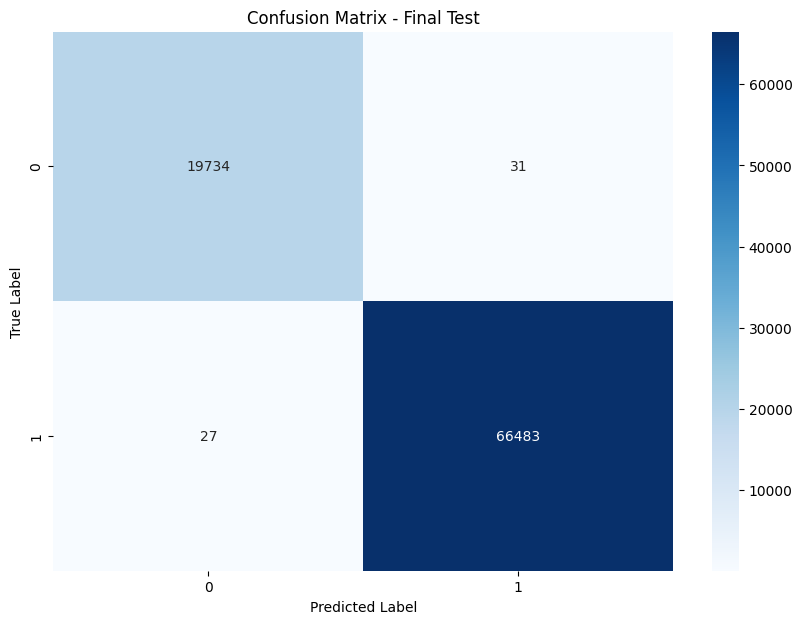

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Final Test")
3
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
# Predicting using the model
y_test_pred = best_model.predict(X_test)

# Calculating R² score
r2 = r2_score(y_test, y_test_pred)
print(f"R² Score: {r2}")

R² Score: 0.9961934705424431


In [ ]:
# Saving trained model for later use
joblib.dump(model, 'ddos_predictor_model.pkl')

['ddos_predictor_model.pkl']

In [ ]:
def predict_ddos(input_data):
    # Converting input  to Df
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Loading the saved model
    loaded_model = joblib.load('ddos_predictor_model.pkl')

    # Predicting using model
    prediction = loaded_model.predict(input_df)

    # final prediction(1=DDoS, 0=Benign)
    result = "DDoS Attack" if prediction[0] == 1 else "Benign"
    return result

In [ ]:
"""example_input = [
    1472.0,  # Fwd Packet Length Max
    1472.0,  # Fwd Packet Length Min
    1472.0,  # Packet Length Min
    1472.0,  # Packet Length Max
    2208.0,  # Avg Packet Size
    0,       # Fwd Header Length
    0,       # Fwd Header Length (Fwd Header Length 1)
    1472.0,  # Fwd Seg Size Min
    2,       # Total Fwd Packets
    0.0,     # Fwd Packet Length Std
    48.0,    # Flow IAT Min
    17,      # Protocol
    0.0,     # Packet Length Std
    2944.0,  # Flow Duration
    48.0,    # Fwd IAT Total
    0,       # ACK Flag Count
    0,       # Init Fwd Win Bytes
    48.0,    # Flow IAT Mean
    48.0,    # Flow IAT Max
    48.0,    # Fwd IAT Mean
    48.0     # Fwd IAT Max
]"""
example_input = [
    31.0,         # Fwd Packet Length Max
    0.0,          # Fwd Packet Length Min
    31.0,         # Packet Length Min
    31.0,         # Packet Length Max
    9.400307945683704,  # Avg Packet Size
    220,          # Fwd Header Length
    220,          # Fwd Header Length (Fwd Header Length 1)
    31.0,         # Fwd Seg Size Min
    11,           # Total Fwd Packets
    0.0,          # Fwd Packet Length Std
    0.0,          # Flow IAT Min
    6,            # Protocol
    0.0,          # Packet Length Std
    35533900,     # Flow Duration
    35533900.0,   # Fwd IAT Total
    0,            # ACK Flag Count
    220,          # Init Fwd Win Bytes
    12.18419244162474,  # Flow IAT Mean
    10019218.0,   # Flow IAT Max
    3553390.0,    # Fwd IAT Mean
    10047556.0    # Fwd IAT Max
]
result = predict_ddos(example_input)
print("Prediction:", result)

Prediction: Benign
